In [3]:
import warnings
from cryptography.utils import CryptographyDeprecationWarning

warnings.filterwarnings(action="ignore", category=CryptographyDeprecationWarning)


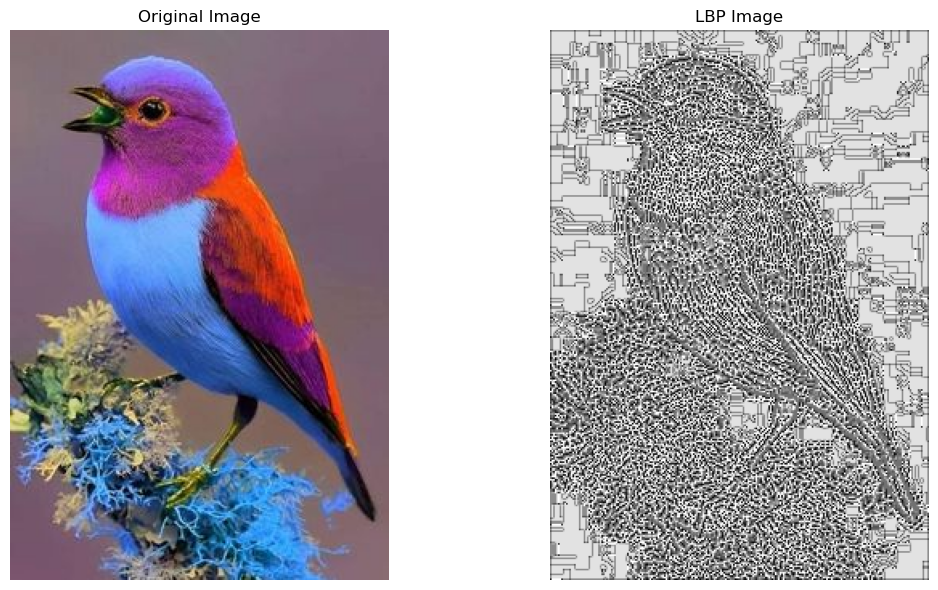

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# LBP parameters
radius = 1  # The radius of the circle (1 means 3x3 region)
n_points = 8 * radius  # Number of points to compare in the circle

# Load the image
image_path = r"C:\Users\roari\Downloads\Bird 7.jpg"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Step 1: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Perform LBP (Local Binary Pattern)
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method="uniform")
    
    # Normalize LBP for visualization (optional)
    lbp_image = np.uint8(255 * (lbp_image / np.max(lbp_image)))
    
    # Step 3: Plot the results
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # LBP Image
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    # Display the result
    plt.tight_layout()
    plt.show()


C:\Users\roari\anaconda3\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


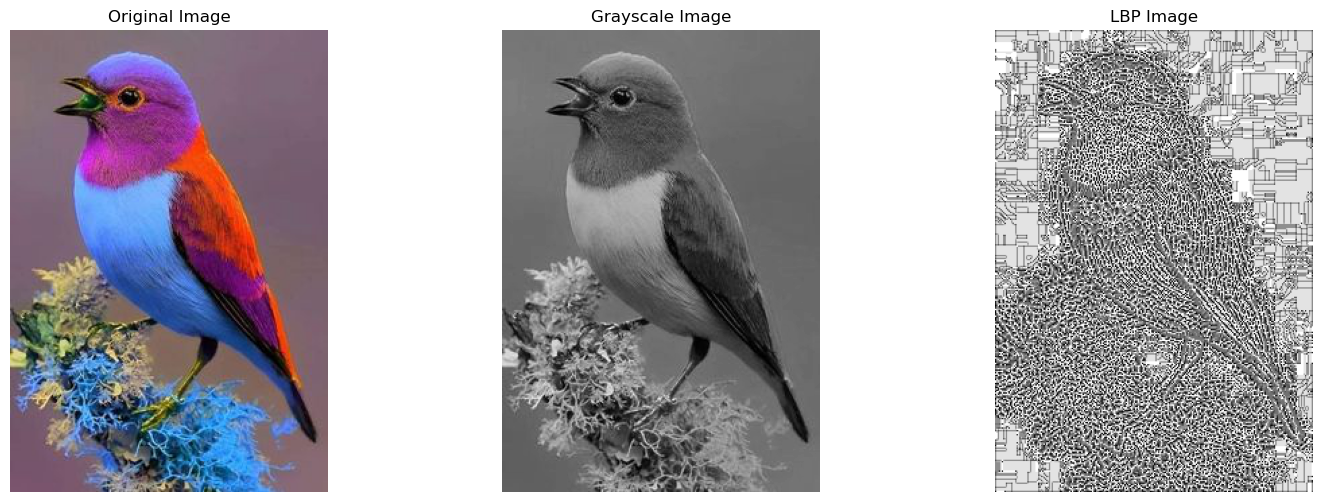

LBP Patterns and their Counts:
Pattern: 0, Count: 4390
Pattern: 1, Count: 5732
Pattern: 2, Count: 3535
Pattern: 3, Count: 7171
Pattern: 4, Count: 8196
Pattern: 5, Count: 11764
Pattern: 6, Count: 4804
Pattern: 7, Count: 6484
Pattern: 8, Count: 18723
Pattern: 9, Count: 10149


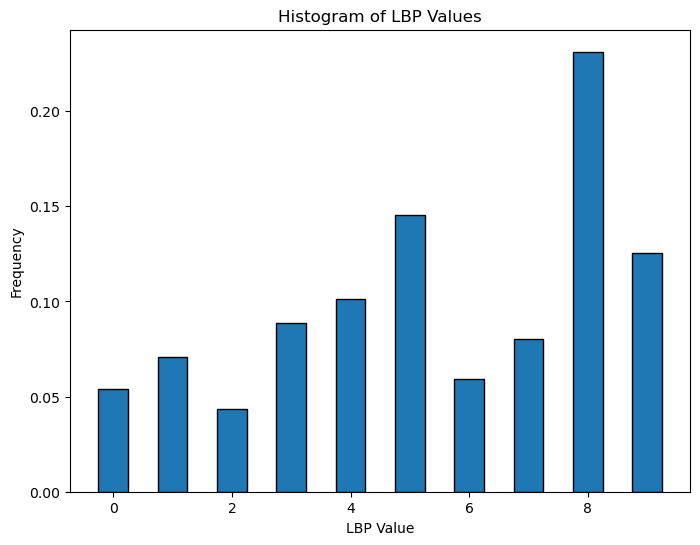

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage import io
from skimage.color import rgb2gray

# Parameters for LBP
radius = 1  # Radius of the circle (default 1)
n_points = 8 * radius  # Number of points to consider in the LBP (8 neighbors)

# Load the image from the specified path (use raw string or double backslashes)
image_path = r"C:\Users\roari\Downloads\Bird 7.jpg"
image = io.imread(image_path)

# Convert image to grayscale
gray_image = rgb2gray(image)

# Apply Local Binary Pattern (LBP)
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Plot the original, grayscale, and LBP image
plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display the LBP image
plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

plt.show()

# Calculate the histogram of LBP values
n_bins = int(lbp.max() + 1)
hist, bins = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

# Print unique LBP patterns and their frequencies
unique_patterns, counts = np.unique(lbp, return_counts=True)
print("LBP Patterns and their Counts:")
for pattern, count in zip(unique_patterns, counts):
    print(f"Pattern: {pattern:.0f}, Count: {count}")

# Plot LBP histogram
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=0.5, edgecolor='black')
plt.title('Histogram of LBP Values')
plt.xlabel('LBP Value')
plt.ylabel('Frequency')
plt.show()
